### Overview of the Titanic Dataset

The Titanic dataset includes demographics and passenger information from 891 of the 2,224 passengers and crew on board the Titanic.

### Key Features in the Dataset

The dataset includes several features that are commonly used to predict survival rates:

- **PassengerId**: An identifier for each traveler.
- **Survived**: Indicates if a passenger survived or not (0 = No, 1 = Yes).
- **Pclass**: Ticket class, a proxy for socio-economic status (1 = 1st, 2 = 2nd, 3 = 3rd).
- **Name**: The name of the passenger.
- **Sex**: The passenger's gender.
- **Age**: The passenger's age in years.
- **SibSp**: The number of siblings or spouses the passenger had aboard the Titanic.
- **Parch**: The number of parents or children the passenger had aboard the Titanic.
- **Ticket**: Ticket number.
- **Fare**: Passenger fare.
- **Cabin**: Cabin number.
- **Embarked**: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

### Challenges

The dataset poses several challenges:
- Handling missing data, especially for the 'Age' and 'Cabin' features.
- Deciding how to encode categorical variables.
- Creating meaningful new features from existing data, such as deriving titles from names, which might give clues about the social status, age, and therefore survival probability.
- Balancing the model's complexity with its accuracy.

### Part 1: Basic DataFrame Operations


In [ ]:
# Import pandas
import pandas as pd


#### Viewing Data
df = pd.read_csv('/content/train.csv')

# Display the first few rows of the DataFrame
df.head()
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Display the last few rows of the DataFrame
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# checking index
df.index



RangeIndex(start=0, stop=891, step=1)

In [ ]:
# checking columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# checking shape
# shows (rows,columns)
df.shape

(891, 12)

In [ ]:
#### Describing Data

# Summary statistics for numerical columns
df.describe()

df['Age'].describe()


df_age = df['Age']
df_age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
# Get concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Part 2: Accessing Data


In [ ]:

#### Selecting Columns

# Select a single column as a Series
series = df['Age']
print(series)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [ ]:
series.ndim

1

In [ ]:
# Select multiple columns
subset = df[['Age','Name']]
subset

,Age,Name
0,22.0,"Braund, Mr. Owen Harris"
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,26.0,"Heikkinen, Miss. Laina"
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,35.0,"Allen, Mr. William Henry"
...,...,...
886,27.0,"Montvila, Rev. Juozas"
887,19.0,"Graham, Miss. Margaret Edith"
888,NaN,"Johnston, Miss. Catherine Helen ""Carrie"""
889,26.0,"Behr, Mr. Karl Howell"


In [ ]:
subset.ndim

2

In [ ]:
# Selecting rows

df[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
# Accessing using loc method
## Access a group of rows and columns by label(s) or a boolean array.


df.loc[0]
df.loc[0:7, ["PassengerId", "Survived", "Pclass"]]

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3
3,4,1,1
4,5,0,3
5,6,0,3
6,7,0,1
7,8,0,3


In [ ]:
# Accessing using iloc method
## Purely integer-location based indexing for selection by position.

df.iloc[1:4, [1,3,6]]

,Survived,Name,SibSp
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,1,"Heikkinen, Miss. Laina",0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1


In [ ]:
df.iloc[:5,:5]

,PassengerId,Survived,Pclass,Name,Sex
0,1,0,3,"Braund, Mr. Owen Harris",male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,1,3,"Heikkinen, Miss. Laina",female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,5,0,3,"Allen, Mr. William Henry",male


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# extract the names using loc and iloc
# index 2

df.loc[2, ['Name', 'Sex', 'Age']]

Name    Heikkinen, Miss. Laina
Sex                     female
Age                       26.0
Name: 2, dtype: object

In [ ]:
df.iloc[2,[3,4,5]]

Name    Heikkinen, Miss. Laina
Sex                     female
Age                       26.0
Name: 2, dtype: object

#### Pandas Series Concepts

In [ ]:
# Extract the 'Age' column into a Series
age_series = df['Age']

# Display the first few entries
age_series.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [ ]:
print(age_series.dtype)  # Prints the data type of the series
print(age_series.index)  # Prints the index of the series
print(age_series.shape)  # Prints the shape of the series


float64
RangeIndex(start=0, stop=891, step=1)
(891,)


In [ ]:
print(age_series.describe())  # Summary statistics for the 'Age' series


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [ ]:
# Access the first element by position
print(age_series.iloc[0])

# Access elements by label (index)
print(age_series.loc[0:10])  # Slicing to get the first 11 elements


22.0
0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
Name: Age, dtype: float64


In [ ]:
# Filter to find ages greater than 18
adult_ages = age_series[age_series > 18]
print(adult_ages.head())


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 575, dtype: float64
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64


In [ ]:
# other ways to flter
#1
df['Age']>30
#2
df[df['Age']>30]

0      False
1       True
2      False
3       True
4       True
       ...  
886    False
887    False
888    False
889    False
890     True
Name: Age, Length: 891, dtype: bool

In [ ]:
# Get a count of unique values in the 'Embarked' column
embarked_counts = df['Embarked'].value_counts()
print(embarked_counts)

# Display unique values in 'Embarked'
unique_embarked = df['Embarked'].unique()
print(unique_embarked)


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
['S' 'C' 'Q' nan]


# **Continue from here**

In [ ]:
# Q1: Filter and show all passengers who survived.

survived_passengers = df[df['Survived'] == 1]
survived_passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
# Q2: Display all female passengers who were in third class.

female_pclass3 = df[(df['Sex']== 'female') & (df['Pclass'] == 3)]
female_pclass3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [ ]:
# Q3: Identify passengers who embarked from Southampton (S) and paid a fare greater than $50.

Sampton_50 = df[(df['Embarked'] == 'S') & (df['Fare'] > 50)]
Sampton_50

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S


In [ ]:
# Q4: List all passengers who were minors (under 18 years old) traveling alone (without siblings or parents).

passenger_18_alone = df[(df['Age'] < 18) & ((df['Parch'] == 0)  & (df['SibSp'] == 0))]
passenger_18_alone

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
114,115,0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C
138,139,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q
163,164,0,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S
208,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,NaN,Q
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S


In [ ]:
# Q5: Find all passengers who were aged 65 or older.

passenger_65 = df[df['Age'] >= 65]
passenger_65

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [ ]:
# Q6: Show details of passengers who had a cabin and were in second class.
# Use titanic notna() on cabin col for those who had a cabin

had_cabin = df[(df['Cabin'].notna() == True) & (df['Pclass'] == 2)]
had_cabin


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0000,F2,S


In [ ]:
# Q7: Find all female passengers who did not survive.

female_notsurvive = df[(df['Sex'] == 'Female') & (df['Survived'] == 0)]
female_notsurvive

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
# Q8: List all passengers who were in first class and embarked from Cherbourg (C).

passenger_pclass1_c = df[(df['Pclass'] == 1) & (df['Embarked'] == 'C')]
print(passenger_pclass1_c)

     PassengerId  Survived  Pclass  \
1              2         1       1   
30            31         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
839          840         1       1   
842          843         1       1   
849          850         1       1   
879          880         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
30                            Uruchurtu, Don. Manuel E    male  40.0      0   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
..                                                 ...     ...   ... 

In [ ]:
# Q9: Find all passengers who paid more than the 75th percentile of fares and survived.
# use quantile method for fare > .75

percentile_75 = df['Fare'].quantile(0.75)

passenger_75_survived

31.0

In [ ]:
# Q10: Display details of passengers who were under 30 years old
# and had either more than 2 siblings/spouses aboard or more than 2 parents/children aboard.


passenegr_below30 = df[(df['Age'] < 30) & ((df['SibSp'] > 2) | (df['Parch'] > 2))]
passenegr_below30



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S


In [ ]:
# Q11. Identify passengers who embarked from Queenstown (Q) or Cherbourg (C) and whose
# ticket class was either first or second class, but did not survive.

passenger_Q_C = df[((df['Embarked'] == 'Q') | (df['Embarked'] == 'C')) & ((df['Pclass'] == 1) | (df['Pclass'] == 2)) & (df['Survived'] == 0)]
passenger_Q_C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C
135,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C


In [ ]:
# Q12: List all passengers who had a cabin on deck 'B' (you'll need to extract the first letter from the
# Cabin number using .str attribute on the column cabin) and were traveling alone (no siblings/spouses/parents/children).



In [ ]:
# Q13. Find passengers who were older than the median age of the dataset, traveled in third class,
# and paid a fare less than the median fare of third-class passengers.




In [ ]:
# Q14: Show passengers who survived and are either staff (not having a passenger class-it means pclass is na) or children
#under 15 who were in any class.
# Assuming 'Staff' can be deduced by NaNs in 'Pclass' or some other criteria



In [ ]:
# Q15: Display all female passengers from first class whose fare was above the average fare of first-class
# passengers and who embarked at Cherbourg (C).




In [ ]:
# Q16. Group passengers by class and find the average age and median fare for each class.

class_stats = df.groupby('Pclass').agg({'Age': 'mean', 'Fare': 'median'})
class_stats

,Age,Fare
Pclass,,
1,38.233441,60.2875
2,29.877630,14.2500
3,25.140620,8.0500


In [ ]:
# Q17 Sort the passengers by fare in descending order and display the top 10 most expensive tickets.

top_fares = df.sort_values(by='Fare', ascending=False).head(10)
top_fares

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C


In [ ]:
# Q18 Create a pivot table showing the average fare and survival rate grouped by passenger class and sex.

pivot_table = df.pivot_table(values=['Fare', 'Survived'],
                                  index=['Pclass', 'Sex'],
                                  aggfunc={'Fare': 'mean', 'Survived': 'mean'})
pivot_table

Fare  Survived
Pclass Sex                         
1      female  106.125798  0.968085
       male     67.226127  0.368852
2      female   21.970121  0.921053
       male     19.741782  0.157407
3      female   16.118810  0.500000
       male     12.661633  0.135447

In [ ]:
help(df.pivot_table)

Help on method pivot_table in module pandas.core.frame:

pivot_table(values=None, index=None, columns=None, aggfunc: 'AggFuncType' = 'mean', fill_value=None, margins: 'bool' = False, dropna: 'bool' = True, margins_name: 'Level' = 'All', observed: 'bool' = False, sort: 'bool' = True) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Create a spreadsheet-style pivot table as a DataFrame.
    
    The levels in the pivot table will be stored in MultiIndex objects
    (hierarchical indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    values : list-like or scalar, optional
        Column or columns to aggregate.
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as colu

In [ ]:
df.pivot_table(values = ['Fare','Age'],
               index = ['Pclass', 'Sex'],
                aggfunc = {'Fare':'mean', 'Age':'mean'},
               fill_value = 29.6)

Age        Fare
Pclass Sex                          
1      female  34.611765  106.125798
       male    41.281386   67.226127
2      female  28.722973   21.970121
       male    30.740707   19.741782
3      female  21.750000   16.118810
       male    26.507589   12.661633

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Q19: List the total number of survivors and non-survivors for each embarkation point.

survival_counts = df.groupby('Embarked')['Survived'].value_counts().unstack()
survival_counts

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [ ]:
# Q20: Find the top three ages with the highest average fare, grouped by passenger class.

top_avg_fares_by_age = df.groupby(['Pclass', 'Age'])['Fare'].mean().sort_values(ascending=False).groupby('Pclass').head(3)

top_avg_fares_by_age

Pclass  Age 
1       15.0    211.337500
        43.0    211.337500
        18.0    169.612500
2       21.0     42.250000
        60.0     39.000000
        48.0     39.000000
3       7.0      34.406250
        11.0     32.320833
        9.0      27.938537
Name: Fare, dtype: float64

In [ ]:
# Q21. Display the maximum and minimum ages of passengers for each combination of survival status and class.**

age_extremes = df.groupby(['Survived', 'Pclass'])['Age'].agg(['max', 'min'])
age_extremes

max    min
Survived Pclass             
0        1       71.0   2.00
         2       70.0  16.00
         3       74.0   1.00
1        1       80.0   0.92
         2       62.0   0.67
         3       63.0   0.42

In [ ]:
# Q22: Calculate and display the total fare and number of passengers for each major cabin deck (A, B, C, etc.), assuming the first letter of the cabin number indicates the deck.**

df['Deck'] = df['Cabin'].str[0]  # Extract the deck from Cabin
deck_stats = df.groupby('Deck').agg({'Fare': 'sum', 'Deck': 'size'})
deck_stats

,Fare,Deck
Deck,,
A,594.3583,15
B,5334.7709,47
C,5908.9291,59
D,1889.0710,33
E,1472.8542,32
F,243.0583,13
G,54.3250,4
T,35.5000,1


In [ ]:
# Q23: Sort passengers within each class by age and fare in descending order.

sorted_class_age_fare = df.sort_values(by=['Pclass', 'Age', 'Fare'], ascending=[True, False, False])
sorted_class_age_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,A
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,A
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,B
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,0,3,"Boulos, Mr. Hanna",male,NaN,0,0,2664,7.2250,NaN,C,NaN
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C,NaN
611,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S,NaN
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q,NaN


In [ ]:
# Q24: Create a pivot table that shows the sum of fares and count of survivors for each sex and class.**

fare_survivor_pivot = df.pivot_table(values=['Fare', 'Survived'],
                                          index=['Sex', 'Pclass'],
                                          aggfunc={'Fare': 'sum', 'Survived': 'count'})

fare_survivor_pivot

Fare  Survived
Sex    Pclass                     
female 1       9975.8250        94
       2       1669.7292        76
       3       2321.1086       144
male   1       8201.5875       122
       2       2132.1125       108
       3       4393.5865       347

In [ ]:
#Q25.  Determine which ticket class had the highest survival rate, using group by and mean calculation on the Survived column.

best_class_survival = df.groupby('Pclass')['Survived'].mean().idxmax()

best_class_survival

1

In [ ]:
# Get a count of unique values in the 'Embarked' column
embarked_counts = df['Embarked'].value_counts()
print(embarked_counts)

# Display unique values in 'Embarked'
unique_embarked = df['Embarked'].unique()
print(unique_embarked)


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
['S' 'C' 'Q' nan]


<Axes: >

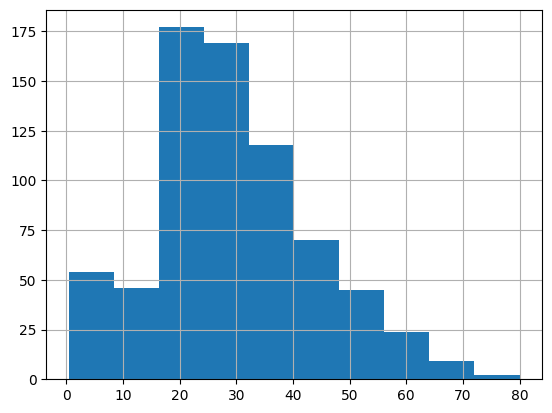

In [ ]:
# Plot a histogram of the 'Age' column
age_series.hist()

### Part 3: Data Manipulation


### 1. Assigning a Scalar Value
If you want every row in the new column to have the same value, you can assign a scalar value directly to a new column name. This is useful for initializing a column or marking data with a constant.

```python
import pandas as pd

# Create a simple DataFrame
df = pd.DataFrame({
    'A': range(1, 6),
    'B': ['a', 'b', 'c', 'd', 'e']
})

# Adding a new column with a scalar value
df['C'] = 10

print(df)
```

In [ ]:
# Adding a new column





### 2. Using an Existing Column
You can create a new column by performing operations on an existing column. This can involve arithmetic operations, string methods, or more complex functions.

```python
# Creating a new column by manipulating an existing column
df['A_squared'] = df['A'] ** 2

# Using a string method
df['B_upper'] = df['B'].str.upper()

print(df)
```

In [ ]:
# Adding a new column



### 3. Using a Function
You can apply a function to an existing column to create a new column using the `.apply()` method. This is very flexible and can be used for more complex data manipulations.

```python
# Define a simple function to categorize data
def categorize(x):
    if x < 3:
        return 'Low'
    elif x < 5:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new column
df['Category'] = df['A'].apply(categorize)

print(df)
```

### 4. Using `assign` Method
The `.assign()` method allows you to create new columns while leaving the original DataFrame untouched, thus following the functional programming paradigms.

```python
# Using assign to create a new column
new_df = df.assign(A_log=df['A'].apply(lambda x: np.log(x)))

print(new_df)
```

### 5. Using Conditions
You can use conditions to create new columns, for example, by using NumPy's `where` function or pandas' own conditional constructs.

```python
import numpy as np

# Create a new column based on a condition
df['Is_A_Large'] = np.where(df['A'] > 3, 'Yes', 'No')

print(df)
```


### 6. Copying Values from Other Columns
Sometimes, you may want to create a new column that starts as a copy of an existing column, which you can then modify independently of the original.

```python
# Copying a column
df['A_copy'] = df['A']

# Now modify the new column without changing the original
df['A_copy'] += 5

print(df)
```

These methods cover most use cases you might encounter when adding new columns to a DataFrame in pandas. Whether you’re initializing with constants, deriving from existing data, or applying functions for complex transformations, pandas offers a robust set of tools for column creation.

### Using `drop()` Method

The primary method for dropping columns in pandas is the `drop()` method. Here’s how to use it:

#### Syntax to Drop a Single Column:
```python
import pandas as pd

# Assuming 'df' is your DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})

# Drop a single column by name
df = df.drop('B', axis=1)  # Remember to specify axis=1 for columns
```

#### Syntax to Drop Multiple Columns:
```python
# Drop multiple columns by name
df = df.drop(['A', 'C'], axis=1)
```

### Parameters:
- **labels**: Column or list of columns you want to drop.
- **axis**: Needs to be set to `1` to indicate dropping columns (setting it to `0` would drop rows).
- **inplace**: If `True`, it modifies the DataFrame in place (does not return anything). If `False`, it returns a new DataFrame.




In [ ]:
# Removing a column



### Using `inplace=True`
If you prefer to modify the DataFrame in place without reassigning it (to save memory or just for convenience), you can use the `inplace=True` parameter:

```python
# Dropping in place
df.drop('B', axis=1, inplace=True)
```

### Dropping Columns Using Column Names
If you have the names of the columns stored in a variable (perhaps dynamically generated), you can drop those as well:

```python
# List of columns to drop
cols_to_drop = ['A', 'C']

# Drop columns using a variable
df.drop(cols_to_drop, axis=1, inplace=True)
```



### Using `del` Keyword
Python's `del` keyword can also be used to remove a column from a DataFrame. This method modifies the DataFrame in place:

```python
# Remove a column using del
del df['B']
```

### Using `pop()` Method
The `pop()` method not only removes the column but also returns it as a Series. This can be useful if you want to use the column for further operations:

```python
# Pop a column and save it to a variable
popped_column = df.pop('B')
```

### Type Conversion

### Handling Missing Values

### Data Transformation

### Feature Engineering